In [13]:
%matplotlib inline


# Linear Regression (normalization vs. standarlization） 

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyflux as pf
from sklearn import preprocessing
import numpy as np
from readers.mat_reader import MatReader
from sklearn import datasets, linear_model

# Load the diabetes dataset
mat_reader = MatReader()
ts_train, xs_train, ys_train = mat_reader.read('ColdComplaintData/Training')
ts_test, xs_test, ys_test = mat_reader.read('ColdComplaintData/Testing')
# print xs_train,xs_n

In [15]:
#Normalization is the process of scaling individual samples to have unit norm. 
# This process can be useful if you plan to use a quadratic form such as the dot-product 
#or any other kernel to quantify the similarity of any pair of samples.

xs_normalized = preprocessing.normalize(xs_train, norm='l2')
xs_test_n = preprocessing.normalize(xs_test, norm='l2')

## Scaling features to a range¶
An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

In [16]:
# doing standalization
xs_scaled = preprocessing.scale(xs_normalized)
xs_test_scaled = preprocessing.scale(xs_test_n)

In [17]:
# scailing in [0,1] range
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std / (max - min) + min

min_max_scaler = preprocessing.MinMaxScaler()
xs_train_minmax = min_max_scaler.fit_transform(xs_normalized)
xs_test_minmax = min_max_scaler.fit_transform(xs_test_n)


56.2550194459
[  1.01363756e-01   2.15480126e-01  -6.27258459e-01  -3.60593765e-03
   4.87607889e-04   9.40904816e-04   2.04214860e-01  -1.22757294e-02
  -7.81813227e-05]
68.5888794622
[ -4.21421557e+03   8.17659437e+02  -1.40354176e+03  -1.12991327e+01
   1.65707852e+01   9.54551386e+00  -1.59492217e+02  -3.89285559e+01
   2.47314339e+00]
71.8739066688
[-0.22572727  0.48178972 -0.07517939 -0.12470939  0.21041652  2.8769813
 -1.34413501 -0.22579941  0.89198895]
68.9283919607
[-2.23563017  2.12868644 -0.74457518 -0.61120291  0.89098902  8.04024651
 -5.47690179 -1.08815641  2.44227223]


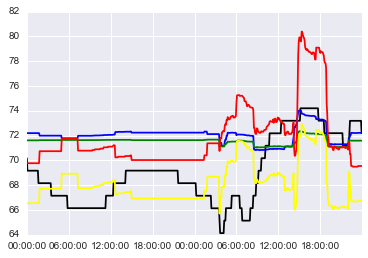

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(xs_train, ys_train)
residual1 = regr.predict(xs_test)
print regr.intercept_
print regr.coef_

regr.fit(xs_normalized, ys_train)
residual2 = regr.predict(xs_test_n)
print regr.intercept_
print regr.coef_

regr.fit(xs_scaled, ys_train)
residual3 = regr.predict(xs_test_scaled)
print regr.intercept_
print regr.coef_

regr.fit(xs_train_minmax, ys_train)
residual4 = regr.predict(xs_test_minmax)
print regr.intercept_
print regr.coef_


# Plot outputs
plt.plot(ts_test, ys_test,  color='black') # actural data
plt.plot(ts_test, residual1, color='blue') # without normalization
plt.plot(ts_test, residual2, color='green') # do normalization
plt.plot(ts_test, residual3, color='red') #do normalization & standarlization
plt.plot(ts_test, residual4, color='yellow') # do Norm. & minmax standalization

plt.show()